# Introduction

In this notebook, I will fuzzify all market state parameters and build a FuzzyStateVector which determines the current state of the market.

In [1]:
%load_ext autoreload
%autoreload 2

In [120]:
# import requires packages
# Append relative path to FuzzyMarketState.py
import sys
sys.path.append('..')

from FuzzyMarketState import FuzzyMarketState
from FuzzyLib import Fuzzifier, FuzzyVar

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
import plotly.tools as tls
plotly.offline.init_notebook_mode(connected=True)

import logging
logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)

import random

# Create object
fms = FuzzyMarketState(logging.WARN)

# load dataframe
df = fms.loadCSV('../csv_data/EURUSD_H4.csv', sep=';')
fms.loadDataframe(df)
df_crisp = fms.buildIndicators()

print('Packages loaded!!')

Packages loaded!!


### Zigzag fuzzification

Zigzag indicator includes: 

- Zigzag flips
- Bollinger indicators

Based on these indicators, several fuzzy parameters can be sinthetically built, as:

##### Duration of Zigzag flip:

Evaluates last N zigzags durations and according with its min-max range, fuzzifies into these 5 categories:

- VerySmall
- Small
- SlightlySmall
- Similar
- SlightlyLarge
- Large
- VeryLarge

##### Range of Zigzag flip:

Evaluates last N zigzags flip range according with its direction and fuzzifies into these 5 categories:

- VerySmall
- Small
- SlightlySmall
- Similar
- SlightlyLarge
- Large
- VeryLarge


In [3]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-zigzag-indicators based on SMA50
_df = fms.fuzzifyZigzag(timeperiod=50)
# plot fuzzy-zigzag variable ZZ_DURATION_1 (duration between consecutive flips)
data = fms.plotFuzzyZigzagVariable(var='ZZ_DURATION_1')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [4]:
# plot fuzzy-zigzag variable ZZ_DURATION_2 (duration between flips of the same direction)
data = fms.plotFuzzyZigzagVariable(var='ZZ_DURATION_2')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [5]:
# plot fuzzy-zigzag variable ZZ_RANGE (flip range against its SMA50)
data = fms.plotFuzzyZigzagVariable(var='ZZ_RANGE')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


##### Bollinger overbought-oversell state:

Evaluates bollinger_%b indicator and fuzzifies into these 7 categories:

- InOverSell
- NearOverSell
- FarFromOverSell
- FarFromAnySignal
- FarFromOverBought
- NearToOverBought
- InOverBought


##### Bollinger bands width:

Evaluates bollinger_width against bollinger_width_sma and fuzzifies into these 5 categories:

- WidthVerySmall
- WidthSmall
- WidthSighthlySmall
- WidthSimilar
- WidthSlightlyLarge
- WidthLarge
- WidthVeryLarge

In [6]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-bollinger indicators against its SMA50
_df = fms.fuzzifyBollinger(timeperiod=50)
# plot fuzzy-bollinger-%b
data = fms.plotFuzzyVariable(var='BOLLINGER_b')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


C:\Users\raulm\Programas\anaconda3\envs\keras\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [8]:
# plot fuzzy-bollinger-width
data = fms.plotFuzzyVariable(var='BOLLINGER_WIDTH')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


### Oscillators fuzzification

Oscillators indicator includes: 

- MACD
- RSI

Based on these indicators, several fuzzy parameters can be sinthetically built, as:


##### MACD approach to crossing

This fuzzification process can be applied to any MACD cross event. Fuzzy sets can be divided into these categories:

*MACD crossover with zero-level*
- MacdFarBelowZero
- MacdMidDistBelowZero
- MacdNearBelowZero
- MacdJustCrossedZero 
- MacdNearAboveZero
- MacdMidDistAboveZero
- MacdFarAboveZero

*MACD crossover with signal-line*
- MacdFarBelowSig
- MacdMidDistBelowSig
- MacdNearBelowSig
- MacdNearAboveSig
- MacdMidDistAboveSig
- MacdFarAboveSig
- MacdJustCrossedSig 



In [9]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-bollinger indicators against its SMA50
_df = fms.fuzzifyMACD(timeperiod=500)
# plot fuzzy-macd-cross-zero
data = fms.plotFuzzyVariable(var='MACD_CROSS_ZERO')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


In [10]:
# plot fuzzy-macd-cross-signal
data = fms.plotFuzzyVariable(var='MACD_CROSS_SIG')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.




##### RSI approach to crossing

This fuzzification process can be applied to any RSI cross event (zero, overbought, oversell). Fuzzy sets can be divided into these categories:

- CrossIsFarAwayBelow
- CrossIsMidRangeBelow
- CrossIsNearBelow
- CrossOccured (this is a singleton set. If =1 the rest =0)
- CrossIsNearAbove
- CrossIsMidRangeAbove
- CrossIsFarAwayAbove



In [11]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-bollinger indicators against its SMA50
_df = fms.fuzzifyRSI(timeperiod=500)
# plot fuzzy-macd-cross-zero
data = fms.plotFuzzyVariable(var='RSI')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


In [12]:
f_sets = [{'type':'left-edge',    'name':'RsiInOverSell',     'p0': 30.0, 'p1': 30.1},
          {'type':'internal-3pt', 'name':'RsiNearOverSell',   'p0': 30.0, 'p1': 30.1, 'p2': 50.0},
          {'type':'internal-3pt', 'name':'RsiFarFromLevels',  'p0': 30.0, 'p1': 50.0, 'p2': 70.0},
          {'type':'internal-3pt', 'name':'RsiNearOverBought', 'p0': 50.0, 'p1': 69.9, 'p2': 70.0},
          {'type':'right-edge'  , 'name':'RsiInOverBought',   'p0': 69.9, 'p1': 70.0}]
traces = Fuzzifier.plotFuzzySets(f_sets, range=[0,100], colors=['red','blue','green','violet','orange','rose','cyan'])
py.iplot(traces, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Moving Averages fuzzification

Based on SMA_BULLISH_TREND and SMA_BEARISH_TREND indicators, a fuzzy-trend indicator can be built

- MacdFarBelowZero
- MacdMidDistBelowZero
- MacdNearBelowZero
- MacdJustCrossedZero 
- MacdNearAboveZero
- MacdMidDistAboveZero
- MacdFarAboveZero



In [14]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-sma indicators against its SMA50
_df = fms.fuzzifyMovingAverages(timeperiod=14)
# plot fuzzy-sma-bullish-trend
data = fms.plotFuzzyVariable(var='SMA_BULLISH_TREND')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


In [15]:
# plot fuzzy-sma-bearish-trend
data = fms.plotFuzzyVariable(var='SMA_BEARISH_TREND')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


### Fibonacci levels fuzzification

Based on different FIBO_xx levels, fuzzy-indicators can be built within these fuzzy-sets:

- FarFromFiboLevel
- NearFiboLevel
- InFiboLevel
- NearFiboLevel 
- FarFromFiboLevel

Fuzzy variables are: 

- FUZ_FIBO_RETR and FIBO_EXTN gives indication of the nearest level ('FIBO_023', 'FIBO_161', ...) or 'none'
- FUZ_FIBO_RETR_S-2,...,FUZ_FIBO_RETR_S+2 provides membership
- FUZ_FIBO_EXTN_S-2,...,FUZ_FIBO_EXTN_S+2 (memberships)



In [16]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-fibo indicators
_df = fms.fuzzifyFibo()
# plot fuzzy-fibo-retracements
data = fms.plotFuzzyVariable(var='FIBO_RETR')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


In [17]:
# plot fuzzy-fibo-extensions
data = fms.plotFuzzyVariable(var='FIBO_EXTN')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


### Support & Resistance fuzzification

Based on 2 last support and resistance levels, a new fuzzy-variable is generated, which measures distance from price to those SR levels, returning the most closer:

- FarBelowSRLevel
- NearBelowSRLevel
- InSRLevel
- NearAboveSRLevel 
- FarAboveSRLevel

Fuzzy variable is FUZ_SR_DISTANCE: 


In [104]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-sr indicators
_df = fms.fuzzifySRLevels(timeperiod=1000)
# plot fuzzy-sr-distance
data = fms.plotFuzzyVariable(var='SR_DISTANCE')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


### Channels fuzzification

Builds CHHI_DISTANCE and CHLO_DISTANCE fuzzy-variables within these fuzzy sets:
- FarBelow
- NearBelow
- In
- NearAbove
- FarAbove

In [108]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-chhi-distance and fuzzy-ch-lo-distance indicators
_df = fms.fuzzifyChannel()
# plot fuzzy-chhi-distance
data = fms.plotFuzzyVariable(var='CHHI_DISTANCE')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


In [109]:
# plot fuzzy-chhi-distance
data = fms.plotFuzzyVariable(var='CHLO_DISTANCE')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


### Trend fuzzification

Builds TREND_STRENGTH fuzzy-variable within these fuzzy sets:
- StrongBearish
- MidBearish
- WeakBearish
- Undefined
- WeakBullish
- MidBullish
- StrongBullish


In [113]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-trend-strength indicator
_df = fms.fuzzifyTrend()
# plot fuzzy-trend-strength
data = fms.plotFuzzyVariable(var='TREND_STRENGTH')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None
The draw time for this plot will be slow for clients without much RAM.


### Divergence fuzzification

Builds BULL_DIV_STRENGTH y BEAR_DIV_STRENGTH fuzzy-variables within these fuzzy sets:
- NoDiv
- WeakDiv
- StrongDiv

In [121]:
# set logging level
fms.setLoggingLevel(logging.WARN)
# build fuzzy-divergence-strength indicator
_df = fms.fuzzifyDivergence()
# plot fuzzy-divergence-strength
data = fms.plotFuzzyVariable(var='BULL_DIV_STRENGTH')
py.iplot(data, filename='simple_ohlc')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly:443
DEBUG:urllib3.connectionpool:https://plot.ly:443 "POST /clientresp HTTP/1.1" 200 None


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


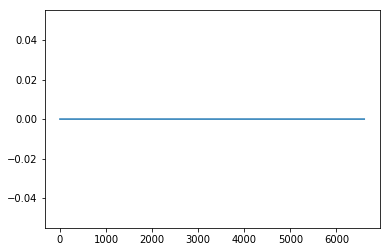

In [133]:
_df.DIV_HID_BULL_MACD.plot()